In [274]:
%config Completer.use_jedi = False
# Speed up tab autocompletion

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setting up

Matplotlib has many styles available, we can see the available options using:

In [12]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

We shall use `seaborn`

In [32]:
plt.style.use('seaborn')

# Exploration
Going into `plt.subplots` documentation (hit `Shift+Tab+Tab`) reveals some of the other matplotlib internals that it uses in order to give us what we asked for. 

These include :<br>
1. `plt.subplot`
3. `plt.figure`
3. `mpl.figure.Figure`
4. `mpl.figure.Figure.add_subplot`
5. `mpl.gridspec.GridSpec`
6. `mpl.axes.Axes`

Let's try and figure out what these functions / classes do.

## Recreating `plt.subplots` with basic matplotlib functionality

Text(0.5, 0.98, '2x2 Grid')

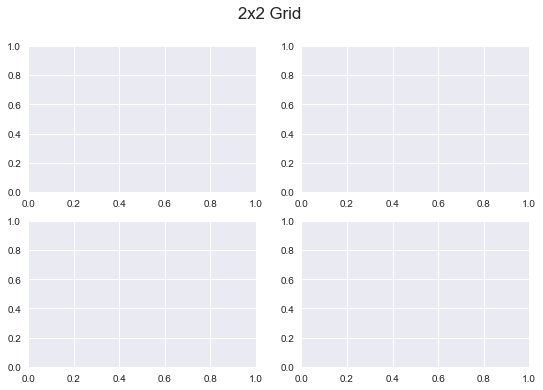

In [276]:
# This is what we need to recreate. We'll try and get a bit more creative though
fig, ax = plt.subplots(2,2)
fig.suptitle("2x2 Grid")

### Deviating...

I didn't know this was possible:

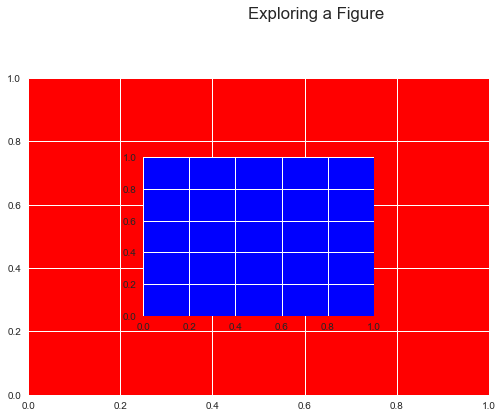

In [277]:
fig = mpl.figure.Figure();

fig.suptitle("Exploring a Figure")

ax1 = mpl.axes.Axes(fig=fig, rect=[0,0,0.8,0.8], fc='red')
ax2 = mpl.axes.Axes(fig=fig, rect=[0.2, 0.2, 0.4, 0.4], fc='blue')
# rect : [left, bottom, width, height] : specifies position and size of an Axes inside of a Figure

fig.add_axes(ax1)
fig.add_axes(ax2)

fig

*That means you can put random axes at random places inside of a Figure. Hmm. Interesting.*

## Recreating our subplots literally from scratch

An `Axes` in matplotlib is simply a place where you can draw plots. Think of it as a page in a notebook (where the figure is the notebook) except the fact that this page can be of various sizes and can be placed at various positions.

A `Figure` simply holds a given number of axes at a time

You can create a Figure (Notebook hard-cover) and Axes (pages) separately and then decide where to put each `Axes` in the `Figure`

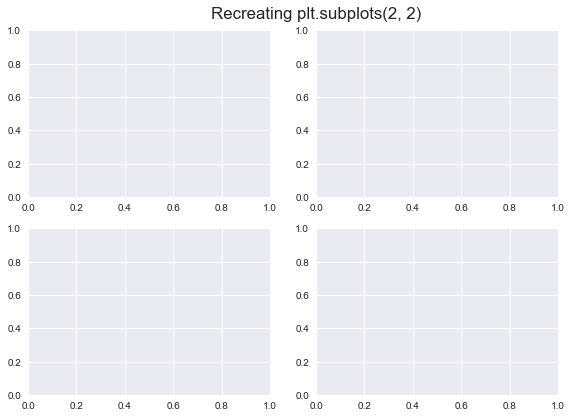

In [278]:
fig = mpl.figure.Figure(); fig

fig.suptitle("Recreating plt.subplots(2, 2)")

ax1 = mpl.axes.Axes(fig=fig, rect=[0,0,0.42,0.42])
ax2 = mpl.axes.Axes(fig=fig, rect=[0, 0.5, 0.42, 0.42])
ax3 = mpl.axes.Axes(fig=fig, rect=[0.5,0,0.42,0.42])
ax4 = mpl.axes.Axes(fig=fig, rect=[0.5, 0.5, 0.42, 0.42])
# rect : [left, bottom, width, height] : specifies position and size of an Axes inside of a Figure

fig.add_axes(ax1)
fig.add_axes(ax2)
fig.add_axes(ax3)
fig.add_axes(ax4)

fig

# That means you can put random axes at random places inside of a Figure. Hmm. Interesting.

## Using gridspec.GridSpec
Docs : https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec

GridSpec objects allow us fine-grained control over how our plot is exactly divided into subplots.<br>
You can essentially decide how your plot will be divided into subplots and what their relative sizes will be using a GridSpec.

Using our previous analogy, this helps us restrict (or pre-decide) where and how our pages will be fit inside of any notebook they go into. Or look at it another way, we can have each page say how it wants to be placed no matter what notebook you put them into by using `GridSpec`

Lets see how you can use this

In [305]:
# But first, let's get this over with
fig1 = plt.figure();
fig2 = mpl.figure.Figure(); 

print(fig1)
print(fig2)

Figure(576x396)
Figure(576x396)


<Figure size 576x396 with 0 Axes>

**It seems as if both fig1 and fig2 give back identical objects**

So, we'll switch to using just `plt.figure()` instead of `mpl.figure.Figure()` to save keystrokes

In [280]:
def annotate_axes(fig):
    """Taken from https://matplotlib.org/gallery/userdemo/demo_gridspec03.html#sphx-glr-gallery-userdemo-demo-gridspec03-py
       takes a figure and puts an 'axN' label in the center of each Axes
    """
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

In [289]:
fig = plt.figure()

# We will try and vary axis sizes here just to see what happens
# Look at the resulting figure and try and figure out what's going on with each parameter
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1, 2], height_ratios=[4, 1])

<Figure size 576x396 with 0 Axes>

You can pass `GridSpec` objects to a `Figure` to create subplots in your desired sizes and proportions like so :

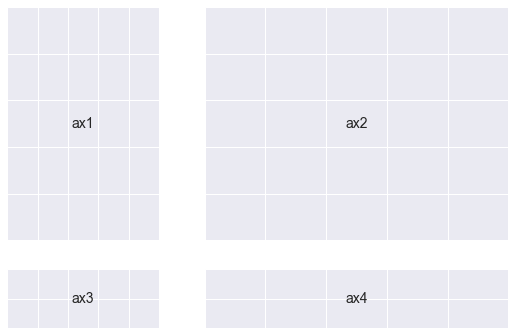

In [292]:
fig.clear()
ax1, ax2, ax3, ax4 = [fig.add_subplot(gs[0]),
                     fig.add_subplot(gs[1]),
                     fig.add_subplot(gs[2]),
                     fig.add_subplot(gs[3])]

annotate_axes(fig)
fig



Doing the same thing in a simpler way



In [293]:
def add_gs_to_fig(fig, gs): 
    for g in gs: fig.add_subplot(g)

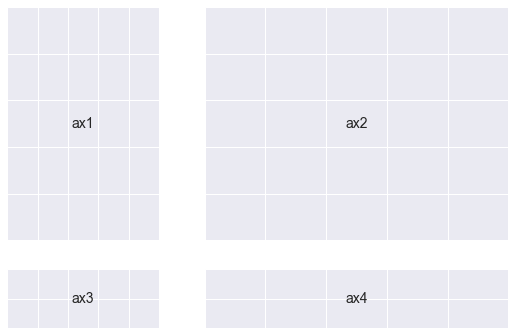

In [294]:
fig.clear()
add_gs_to_fig(fig, gs)
annotate_axes(fig)
fig

## A very weird observation: (which gives us yet more clarity)
Notice how after each print operation, different addresses get printed for each `gs` object.

In [295]:
gs[0], gs[1], gs[2], gs[3]

(<matplotlib.gridspec.SubplotSpec at 0x1a2d3fd750>,
 <matplotlib.gridspec.SubplotSpec at 0x1a2c056750>)

In [296]:
gs[0], gs[1], gs[2], gs[3]

(<matplotlib.gridspec.SubplotSpec at 0x1a2d3e7550>,
 <matplotlib.gridspec.SubplotSpec at 0x1a2d3e7310>)

In [297]:
print(gs[0,0], gs[0,1], gs[1, 0], gs[1, 1])

<matplotlib.gridspec.SubplotSpec object at 0x1a2d3ded10> <matplotlib.gridspec.SubplotSpec object at 0x1a2c063650> <matplotlib.gridspec.SubplotSpec object at 0x1a2c0632d0> <matplotlib.gridspec.SubplotSpec object at 0x1a2c063f90>


In [298]:
print(gs[0,0], gs[0,1], gs[1, 0], gs[1, 1])

<matplotlib.gridspec.SubplotSpec object at 0x1a2d3b94d0> <matplotlib.gridspec.SubplotSpec object at 0x1a2d3b9c10> <matplotlib.gridspec.SubplotSpec object at 0x1a2d3b9fd0> <matplotlib.gridspec.SubplotSpec object at 0x1a2d3b9d90>


**Lets understand why this happens:**

*Notice how a group of `gs` objects indexed into at the same time also produces just one object instead of multiple objects*

In [299]:
gs[:,:], gs[:, 0]
# both output just one object each

(<matplotlib.gridspec.SubplotSpec at 0x1a2d707210>,
 <matplotlib.gridspec.SubplotSpec at 0x1a2c063c10>)

In [300]:
# Lets try another `gs` object, this time a little more crowded
# I chose the ratios randomly
gs = mpl.gridspec.GridSpec(nrows=3, ncols=3, width_ratios=[1, 2, 1], height_ratios=[4, 1, 3])

Now notice how we can create different kinds of plots **while using the same `GridSpec` object** using this knowledge:

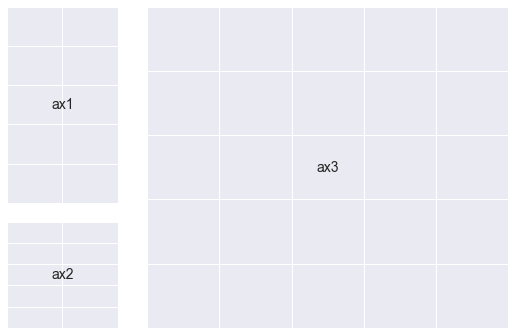

In [302]:
fig = plt.figure()
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[:, 1:])
annotate_axes(fig)

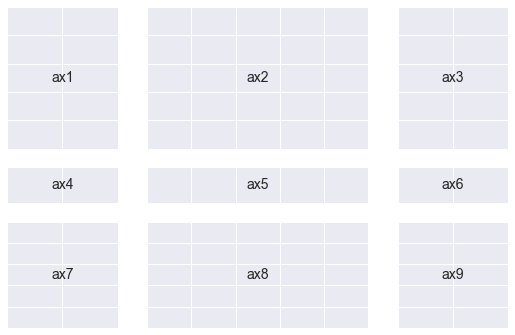

In [303]:
fig.clear()
add_gs_to_fig(fig, gs)
annotate_axes(fig)
fig

This ability to create different grid variations that `GridSpec` provides is probably the reason for that anomaly we just saw.

It creates new objects everytime you index into it because it will be very troublesome to store all permutations of grid-spec objects into one group in memory (try and count permutations for a `GridSpec` of 10x10 and you'll know why)

---
## Now let's finally create `plt.subplots(2,2)` once again using GridSpec

yayy


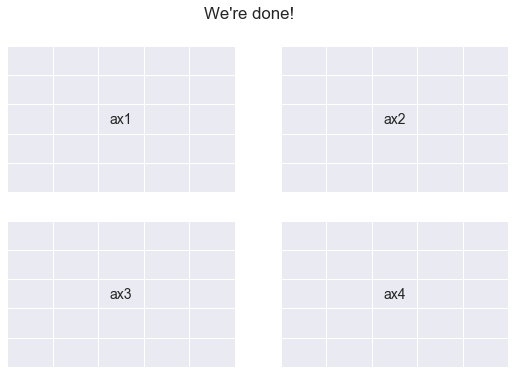

In [273]:
fig = plt.figure()
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2)
add_gs_to_fig(fig, gs)
annotate_axes(fig)
fig.suptitle("We're done!")
print("yayy")

# A few unrelated (maybe) words ...

I read a tweet by someone cursing matplotlib (for its API) a while ago and decided to finally understand what the hell is going on with these figures and axes and subplots and what not inside of this library. So I sat by myself and wrote the only thing I ever write when using matplotlib : `fig, ax = plt.subplots(a, b)` and made a commitment to get to the depth of what's going on under the hood here.
So I opened up the documentation for this function, made a list of all the other important seeming parts of the library that were mentioned here and went into the official docs for each, while also still tinkering with some other parts and functionalities that were not explicitly mentioned in the official docs.
The result of this exercise is: 
1. This notebook
2. Me (and hopefully, anyone reading this) having a much more fundamental understanding of the most important components of a very important python visualization library

This makes me reflect on how sometimes it is very important to take a few hours off from your day and just dive deeply into something with an intention to completely take apart as many layers and abstractions as you can. In the end you come out feeling much more powerful and capable than what you were when you decided to dive deep.

Anyways, I hope you learned something from this notebook.

To best absorb the contents of this notebook, I would recommend that you try and replicate each part of the notebook without looking at it again (barring a few sneak-peeks maybe)